## Requirements

### Web-Scraping
#### 1. Take the base wg-gesucht URL and scrape the shared flats listed on the website
#### 2. most important data points are price, room size and number of flat mates

### Data Analyis
#### 1. Correlation analysis of room price and room size. Hypothesis: positive correlation
#### 2. Correlation analysis of room price and number of flat mates. Hypothesis: negative correlation

### Import all neccessary libraries

In [1]:
import requests
import random
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [25]:
data = {'Bewohner': [], 'Eintrag': [], 'Miete': [], 'Groese': [] , 'Stadtteil': [], 'frei ab': [], 'frei bis': []}
df = pd.DataFrame(data=data)
print(df)


Empty DataFrame
Columns: [Bewohner, Eintrag, Miete, Groese, Stadtteil, frei ab, frei bis]
Index: []


In [26]:
proxies = [
    'http://24.106.221.230:53281',
    'http://118.70.12.171:53281',
    'http://198.199.86.11:8080',
    'http://107.173.80.140:9000',
    'http://159.203.61.169:8080',
    'http://134.209.29.120:3128',
    'http://192.140.42.83:31511',
    'http://20.187.77.5:80',
    'http://64.225.8.191:9986',
    'http://198.59.191.234:8080',
    'http://51.178.47.12:80',
    'http://82.180.163.163:80',
    'http://158.69.72.138:9300',
    'http://198.49.68.80:80',
    'http://51.15.192.229:8080',
    'http://161.35.70.249:8080',
    'http://143.110.232.177:80',
    'http://154.118.228.212:80',
    'http://177.87.144.122:5566',
    'http://200.25.254.193:54240',
    'http://82.180.163.163:80'
    ]
userAgents = [
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
]

In [27]:
def makeRequest(url):
    try:
        proxy = {'http' : proxies[random.randint(0, len(proxies) - 1)]}
        print('Current Proxy: ', proxy)
        return requests.get(url,
                            proxies=proxy,
                            headers={'User-Agent' : userAgents[random.randint(0, len(userAgents) -1)]},
                            timeout=5)
    except:
        print("PROBLEM WHILE MAKING REQUEST")

def scrapeTable(tbody) -> None:
    data = []
    rows = tbody.findAll('tr')
    for row in rows:
        data.append(getFlatmates(row))
        data.append(getDatePosted(row))
        data.append(getPrice(row))
        data.append(getRoomSize(row))
        data.append(getNeighborhood(row))
        data.append(getMoveInDate(row))
        data.append(getMoveOutDate(row))
        
        df.loc[len(df)] = data
        data.clear()
    
    print(data)

def getFlatmates(row):
    flatMatesDict = row.findAll('td')[1].span.attrs # returns dictionary
    return flatMatesDict.get('title')

def getDatePosted(row):
    return row.findAll('td')[2].span.text.strip()

def getPrice(row):
    return row.findAll('td')[3].b.text.strip()

def getRoomSize(row):
    return row.findAll('td')[4].span.text.strip()

def getNeighborhood(row):
    return  row.findAll('td')[5].span.text.strip()

def getMoveInDate(row):
    return  row.findAll('td')[6].span.text.strip()

def getMoveOutDate(row):
    date = row.findAll('td')[7].span
    if type(data) is str:
        return date.text.strip()
    
    return ""

In [ ]:
#df.head()
for i in range(30):
    print(i)
    res = makeRequest(f'https://www.wg-gesucht.de/wg-zimmer-in-Mannheim.85.0.0.{i}.html')
    page = BeautifulSoup(res.content, 'html.parser')
    try: 
        #df = pd.read_html(res.text)[0]
        scrapeTable(page.findAll('tbody')[0])
    except:
        print("Error")
        break

In [31]:
df.head()
df.to_excel('wg_data.xlsx')

['2er WG (1w,0m,0d)', '3er WG (1w,1m,0d)', '4er WG (1w,2m,0d)', '4er WG (1w,2m,0d)', '3er WG (1w,1m,0d)', '5er WG (2w,2m,0d)', '2er WG (0w,0m,0d)', '4er WG (0w,3m,0d)', '3er WG (1w,1m,0d)', '3er WG (2w,0m,0d)', '4er WG (1w,2m,0d)', '3er WG (0w,2m,0d)', '5er WG (3w,1m,0d)', '5er WG (2w,2m,0d)', '3er WG (1w,0m,0d)', '8er WG (3w,4m,0d)', '3er WG (1w,1m,0d)', '2er WG (0w,1m,0d)', '4er WG (0w,3m,0d)', '4er WG (0w,3m,0d)', '12er WG (0w,7m,0d)', '6er WG (0w,5m,0d)', '5er WG (0w,4m,0d)', '2er WG (0w,1m,0d)', '4er WG (1w,2m,0d)', '5er WG (2w,2m,0d)', '3er WG (1w,1m,0d)', '2er WG (0w,1m,0d)', '5er WG (1w,3m,0d)', '3er WG (2w,0m,0d)', '2er WG (1w,0m,0d)', '2er WG (1w,0m,0d)', '3er WG (1w,1m,0d)', '5er WG (2w,2m,0d)', '3er WG (0w,2m,0d)', '4er WG (1w,0m,0d)', '2er WG (0w,1m,0d)', '3er WG (1w,1m,0d)', '5er WG (2w,2m,0d)', '4er WG (2w,1m,0d)', '2er WG (1w,0m,0d)', '4er WG (0w,3m,0d)', '2er WG (0w,0m,0d)', '8er WG (0w,0m,0d)', '3er WG (2w,0m,0d)', '2er WG (1w,0m,0d)', '2er WG (0w,1m,0d)', '3er WG (1w

In [48]:
rentPrice = df.iloc[:, 2].tolist()
roomSize = df.iloc[:, 3].tolist()
flatmates = df.iloc[:, 0].tolist()

for i, price in enumerate(rentPrice):
    rentPrice[i] = int(price[0:len(price) - 1])

for i, room in enumerate(roomSize):
    roomSize[i] = int(room[0: len(room) - 2])

for i, flat in enumerate(flatmates):
    flatmates[i] = int(flat[0:1])

print(len(rentPrice), rentPrice)
print(len(roomSize), roomSize)
print(len(flatmates), flatmates)

600 [400, 305, 500, 460, 345, 550, 525, 350, 460, 431, 376, 450, 275, 290, 390, 370, 350, 661, 320, 320, 320, 380, 320, 650, 390, 460, 465, 515, 400, 480, 460, 450, 395, 300, 450, 300, 560, 400, 250, 510, 600, 429, 530, 430, 550, 250, 440, 340, 465, 290, 470, 450, 480, 320, 190, 450, 610, 565, 450, 500, 500, 385, 400, 450, 490, 480, 415, 530, 450, 375, 480, 386, 565, 500, 590, 600, 550, 520, 600, 600, 351, 465, 350, 575, 535, 400, 470, 540, 600, 300, 500, 425, 495, 487, 455, 500, 440, 395, 600, 595, 429, 400, 485, 545, 355, 400, 500, 300, 360, 360, 350, 280, 395, 515, 480, 420, 249, 442, 490, 450, 650, 700, 500, 463, 302, 650, 450, 270, 440, 380, 500, 400, 520, 575, 490, 410, 410, 350, 450, 650, 450, 440, 400, 600, 330, 360, 535, 550, 450, 384, 260, 389, 550, 500, 336, 360, 360, 393, 510, 490, 365, 395, 650, 486, 550, 423, 550, 486, 290, 560, 540, 625, 420, 750, 440, 460, 500, 450, 345, 330, 320, 380, 570, 419, 320, 640, 450, 405, 422, 371, 393, 345, 525, 560, 480, 400, 1570, 430, 425,

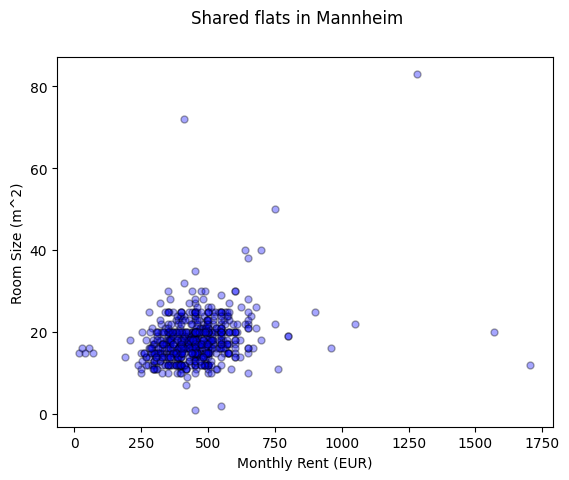

PearsonRResult(statistic=0.2908139955679034, pvalue=3.6966204454801097e-13)

In [50]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
#ax.grid()
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Monthly Rent (EUR)')
plt.ylabel('Room Size (m^2)')
plt.scatter(rentPrice, roomSize, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, roomSize)


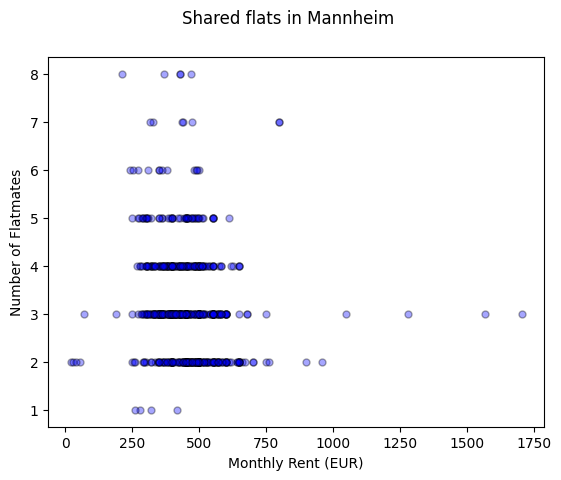

PearsonRResult(statistic=-0.12981309744721978, pvalue=0.0014394531071384889)

In [51]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
#ax.grid()
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Monthly Rent (EUR)')
plt.ylabel('Number of Flatmates')
plt.scatter(rentPrice, flatmates, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, flatmates)